# Debugging and Stress Testing

In [39]:
# import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [40]:
# load the elections datasets
df = pd.read_csv('/content/2020_out_heading_matched_out.csv')

In [41]:
# check the first 5 rows of the dataframe
df.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_,COMPUTERSAndInternetUseTotalHouseholds,COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent,COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent,LastFourthElection_Republican,LastThirdElection_Republican,LastSecondElection_Republican,LastElection_Republican,Target,Poll
0,1,0,0,0,0,0,0,0,0,0,...,-0.937159,-0.216342,-1.577553,-1.336384,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0.775301,-0.860445,1.384752,0.643917,1,1,1,1,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0.340667,0.086206,1.033292,0.452275,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,-1.219672,-0.503647,-1.527345,-1.911310,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,2.570342,4.191641,1.284335,1.282724,0,0,0,0,0,0


In [42]:
# check the shape of the dataframe
df.shape

(50, 364)

In [43]:
data_2020_augmented = pd.concat([df, df], ignore_index=True)

In [44]:
# check the shape of the augmented dataframe
data_2020_augmented.shape

(100, 364)

In [45]:
# split df into features (X) and label (y)
X = data_2020_augmented.drop('Target', axis=1)  # Drop the target column for features
y = data_2020_augmented['Target']  # Target column

In [46]:
test_data = pd.read_csv('/content/2023_out_heading_matched_out.csv')

In [47]:
test_data.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_,COMPUTERSAndInternetUseTotalHouseholds,COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent,COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent,LastFourthElection_Republican,LastThirdElection_Republican,LastSecondElection_Republican,LastElection_Republican,Target,Poll
0,1,0,0,0,0,0,0,0,0,0,...,-1.020961,-0.207013,-1.194113,-1.200626,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0.284112,-0.853351,1.323595,0.793232,1,1,1,1,1,1
2,0,0,1,0,0,0,0,0,0,0,...,1.068491,0.104547,0.963923,0.362128,0,0,1,0,1,1
3,0,0,0,1,0,0,0,0,0,0,...,-1.184512,-0.505172,-0.834441,-1.739507,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,2.350199,4.035256,1.143759,1.386001,0,0,0,0,0,0


In [48]:
# create seven duplicate columns 'poll0' to 'poll6' in both training data (X) and test data (test_data)
for i in range(7):
    X[f'poll{i}'] = X[['Poll']]
    test_data[f'poll{i}'] = test_data[['Poll']]

In [49]:
# check the poll columns of the X and test_data
print(X['Poll'])
print(test_data['Poll'])

0     1
1     1
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    0
99    1
Name: Poll, Length: 100, dtype: int64
0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    0
11    1
12    0
13    1
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    1
22    0
23    1
24    1
25    1
26    1
27    1
28    0
29    0
30    0
31    0
32    1
33    1
34    1
35    1
36    0
37    1
38    0
39    1
40    1
41    1
42    1
43    1
44    0
45    0
46    0
47    1
48    0
49    1
Name: Poll, dtype: int64


In [50]:
# split data into training and testing sets
X_train = X
y_train = y
X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

In [51]:
# check the shape of the train features dataset
X_train.shape

(100, 370)

In [52]:
# check the shape of the test features dataset
X_test.shape

(50, 370)

In [53]:
# confirm the unique classes of the target variable for the train and test data
print("Unique classes in y_train:", set(y_train))
print("Unique classes in y_test:", set(y_test))

Unique classes in y_train: {0, 1}
Unique classes in y_test: {0, 1}


In [54]:
# define a neural network model using Keras Sequential API
# define a neural network model using Keras Sequential API
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Another Dropout layer
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.6031 - loss: 0.6976 - val_accuracy: 0.8000 - val_loss: 0.5218
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7891 - loss: 0.4466 - val_accuracy: 0.9500 - val_loss: 0.4080
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9656 - loss: 0.3289 - val_accuracy: 0.9000 - val_loss: 0.3419
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9758 - loss: 0.2758 - val_accuracy: 0.9000 - val_loss: 0.2840
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9773 - loss: 0.1909 - val_accuracy: 0.9000 - val_loss: 0.2256
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9836 - loss: 0.1393 - val_accuracy: 0.9500 - val_loss: 0.1634
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0937 - val_accuracy: 1.0000 - val_loss: 0.1122
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0757 - val_accuracy: 1.0000 - val_loss: 0.0826

In [56]:
# use trained model to make predictions on test data
predictions = model.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [57]:
# calculate the number of predicted wins for each candidate
predicted_winner = np.sum(predictions_binary)  # Count of predicted wins for Candidate A (1)
predicted_loser = len(predictions_binary) - predicted_winner  # Count of predicted wins for Candidate B (0)

print(f"Predicted number of wins for Candidate 1: {predicted_winner}")
print(f"Predicted number of wins for Candidate 0: {predicted_loser}")

Predicted number of wins for Candidate 1: 23
Predicted number of wins for Candidate 0: 27


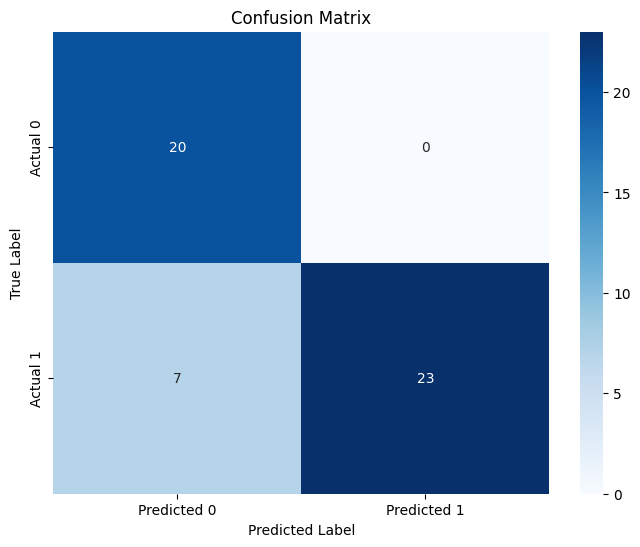

In [58]:
# confusion matrix
cm = confusion_matrix(y_test, predictions_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# accuracy checks
accuracy = accuracy_score(y_test, predictions_binary)
precision = precision_score(y_test, predictions_binary)
recall = recall_score(y_test, predictions_binary)
f1 = f1_score(y_test, predictions_binary)
roc_auc = roc_auc_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8600
Precision: 1.0000
Recall: 0.7667
F1 Score: 0.8679
ROC AUC Score: 0.9617


In [60]:
electoral_college = {
    "Alabama": 9,
    "Alaska": 3,
    "Arizona": 11,
    "Arkansas": 6,
    "California": 54,
    "Colorado": 10,
    "Connecticut": 7,
    "Delaware": 3,
    "District of Columbia": 3,
    "Florida": 30,
    "Georgia": 16,
    "Hawaii": 4,
    "Idaho": 4,
    "Illinois": 19,
    "Indiana": 11,
    "Iowa": 6,
    "Kansas": 6,
    "Kentucky": 8,
    "Louisiana": 8,
    "Maine": 4,
    "Maryland": 10,
    "Massachusetts": 11,
    "Michigan": 15,
    "Minnesota": 10,
    "Mississippi": 6,
    "Missouri": 10,
    "Montana": 4,
    "Nebraska": 5,
    "Nevada": 6,
    "New Hampshire": 4,
    "New Jersey": 14,
    "New Mexico": 5,
    "New York": 28,
    "North Carolina": 16,
    "North Dakota": 3,
    "Ohio": 17,
    "Oklahoma": 7,
    "Oregon": 8,
    "Pennsylvania": 19,
    "Rhode Island": 4,
    "South Carolina": 9,
    "South Dakota": 3,
    "Tennessee": 11,
    "Texas": 40,
    "Utah": 6,
    "Vermont": 3,
    "Virginia": 13,
    "Washington": 12,
    "West Virginia": 4,
    "Wisconsin": 10,
    "Wyoming": 3
}

total_electoral_votes = sum(electoral_college.values())
print(total_electoral_votes)  # Output: 538

538


In [61]:
# Create predictions DataFrame
y_test_pred = predictions_binary
df_pred = pd.DataFrame(y_test_pred,columns=['prediction'])

# Extract state information
state_columns = [col for col in df.columns if col.startswith('state_')]
states = df[state_columns].idxmax(axis=1).apply(lambda x: x.replace('state_', ''))

# Add state and target columns to df_pred
df_pred['state'] = states
df_pred['target'] = y_test

df_pred['electoral_college_Seats'] = df_pred['state'].map(lambda x: electoral_college[x])
df_pred.groupby(['prediction'])['electoral_college_Seats'].sum().reset_index()

,prediction,electoral_college_Seats
0,0,346
1,1,189


In [62]:
df_pred

,prediction,state,target,electoral_college_Seats
0,1,Alabama,1,9
1,1,Alaska,1,3
2,0,Arizona,1,11
3,1,Arkansas,1,6
4,0,California,0,54
5,0,Colorado,0,10
6,0,Connecticut,0,7
7,0,Delaware,0,3
8,0,Florida,1,30
9,0,Georgia,1,16


## Unit Testing

In [63]:
import unittest

# Unit testing
class TestModel(unittest.TestCase):
    def setUp(self):
        self.model = model

    def test_model_output_shape(self):
        test_input = np.random.random((1, X_train.shape[1]))
        prediction = self.model.predict(test_input)
        self.assertEqual(prediction.shape, (1, 1))

    def test_model_output_range(self):
        test_input = np.random.random((100, X_train.shape[1]))
        predictions = self.model.predict(test_input)
        self.assertTrue(np.all((predictions >= 0) & (predictions <= 1)))

# Run unit tests
unittest.main(argv=[''], exit=False)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


.
----------------------------------------------------------------------
Ran 2 tests in 0.249s

OK


## Extensive Edge/Corner Case Testing

In [64]:
# Edge Case Testing
def test_edge_cases():
    zero_input = np.zeros((1, X_train.shape[1]))
    zero_prediction = model.predict(zero_input)
    print(f"Prediction for all zeros: {zero_prediction[0][0]}")

    one_input = np.ones((1, X_train.shape[1]))
    one_prediction = model.predict(one_input)
    print(f"Prediction for all ones: {one_prediction[0][0]}")

    large_input = np.full((1, X_train.shape[1]), 1e6)
    large_prediction = model.predict(large_input)
    print(f"Prediction for very large values: {large_prediction[0][0]}")

    small_input = np.full((1, X_train.shape[1]), 1e-6)
    small_prediction = model.predict(small_input)
    print(f"Prediction for very small values: {small_prediction[0][0]}")

test_edge_cases()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction for all zeros: 0.45305341482162476
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction for all ones: 0.0165893342345953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction for very large values: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction for very small values: 0.4530511200428009


## Scalability Testing

In [65]:
import time

# Scalability Testing
def test_scalability():
    start_time = time.time()
    large_input = np.random.random((10000, X_train.shape[1]))
    predictions = model.predict(large_input)
    end_time = time.time()
    print(f"Time taken to predict 10,000 samples: {end_time - start_time:.2f} seconds")

test_scalability()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Time taken to predict 10,000 samples: 1.43 seconds


## Load Testing

In [66]:
import time
import concurrent.futures

# Load Testing
def load_test(model, df, feature_columns, num_batches=10, batch_size=100, num_workers=5):
    def predict_batch(batch):
        return model.predict(batch)

    # Get the common columns between df and feature_columns
    common_columns = list(set(df.columns) & set(feature_columns))

    # Use common_columns to select the desired columns from df
    batches = [df[common_columns].sample(n=batch_size, replace=True).values
               for _ in range(num_batches)]

    total_requests = num_batches * batch_size
    start_time = time.time()

    with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
        futures = [executor.submit(predict_batch, batch) for batch in batches]
        concurrent.futures.wait(futures)

    end_time = time.time()
    total_time = end_time - start_time

    print(f"Load test: {num_batches} batches, {batch_size} samples per batch")
    print(f"Total requests: {total_requests}")
    print(f"Total time: {total_time:.2f} seconds")
    print(f"Average time per request: {total_time / total_requests:.4f} seconds")
    print(f"Requests per second: {total_requests / total_time:.2f}")

load_test(model, df, X_train.columns) # Pass X_train.columns as feature_columns

Load test: 10 batches, 100 samples per batch
Total requests: 1000
Total time: 1.48 seconds
Average time per request: 0.0015 seconds
Requests per second: 676.41


## Speed/Latency Testing

In [67]:
import time

# Speed/Latency Experiments
def measure_latency():
    latencies = []
    for _ in range(100):
        test_input = np.random.random((1, X_train.shape[1]))
        start_time = time.time()
        _ = model.predict(test_input)
        end_time = time.time()
        latencies.append(end_time - start_time)

    print(f"Average latency: {np.mean(latencies):.6f} seconds")
    print(f"95th percentile latency: {np.percentile(latencies, 95):.6f} seconds")

measure_latency()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

## Error Correction

In [68]:
# Error Correction Example
try:
    result = model.predict(X_test)
except ValueError as e:
    print(f"Error encountered: {e}")
    print("Attempting to reshape input data...")
    X_test_reshaped = X_test.reshape(-1, X_train.shape[1])
    result = model.predict(X_test_reshaped)
    print("Prediction successful after reshaping.")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [69]:
from tensorflow.keras.optimizers import Adam

# Model Optimization
def optimize_model():
    optimized_model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ])

    optimized_model.compile(optimizer=Adam(learning_rate=0.001),
                            loss='binary_crossentropy',
                            metrics=['accuracy'])

    history = optimized_model.fit(X_train, y_train,
                                  epochs=20,
                                  batch_size=64,
                                  validation_split=0.2,
                                  callbacks=[early_stopping])

    return optimized_model, history

optimized_model, optimized_history = optimize_model()

# Compare performance
original_loss, original_accuracy = model.evaluate(X_test, y_test)
optimized_loss, optimized_accuracy = optimized_model.evaluate(X_test, y_test)

print(f"Original model - Loss: {original_loss:.4f}, Accuracy: {original_accuracy:.4f}")
print(f"Optimized model - Loss: {optimized_loss:.4f}, Accuracy: {optimized_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step - accuracy: 0.6500 - loss: 0.6092 - val_accuracy: 0.7000 - val_loss: 0.6401
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9865 - loss: 0.2275 - val_accuracy: 0.7000 - val_loss: 0.5438
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9531 - loss: 0.1747 - val_accuracy: 0.7500 - val_loss: 0.4768
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8546 - loss: 1.1087 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6083 - loss: 0.5855
Original model - Loss: 1.0462, Accuracy: 0.8600
Optimized model - Loss: 0.5941, Accuracy: 0.6000
